# Estadística Aplicada
## PIA Pronósticos de Metrorrey
## Estadística Aplicada
### Equipo: Los Galácticos
#### 2034187 Acosta de Lara David Denzel 
#### 1842489 Castellanos Flores Geraldy 
#### 1851389 Garza del Río Evelyn 
#### 2034175 Hernández Rodríguez Edwin Javier
### 16 mayo de 2023

### Introducción

La serie de tiempo a analizar tiene como datos a la cantidad de usuarios que utilizan el transporte subterráneo para llegar a sus destinos. Dicha base de datos recaba la información desde enero del año 1995 y su límite es en diciembre del año 2021. La frecuencia de estos datos es mensual así como resaltar que la cantidad de usuarios por mes, se encuentre en 'miles'.

En medida que ha pasado el tiempo, la ciudad de Monterrey y toda su área metropolitana han crecido económica y demográficamente en la cantidad de personas que viven en los alrededores, por lo que el transporte público ha elevado su popularidad y uso, el metro al ser un transporte "económico" y rápido, ha sido la preferencia de miles de usuarios que lo usan como medio para llegar a su casa, trabajo, escuela o cualquier otro destino, por lo que se espera que la cantidad de personas que lo usen vaya en aumento, a excepción del inicio de la pandemia que fue cuando se tomaron medidas estrictas.

A continuación se graficará el comportamiento del uso del metro a lo largo de los años.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metrorrey = pd.read_csv('pasajeros_metrorrey.csv')

In [3]:
metrorrey.head()

,Periodos,miles_pasajeros_month
0,1995/01,3439.0
1,1995/02,2879.0
2,1995/03,3103.0
3,1995/04,3491.0
4,1995/05,3109.0


In [4]:
#convertimos la variable fecha en 'datetime'
metrorrey['Periodos'] = pd.to_datetime(metrorrey['Periodos'], format = '%Y/%m') 

In [5]:
metrorrey = metrorrey.set_index('Periodos')

In [6]:
metrorrey.index.freq = 'MS'
metrorrey.index #debería decir formato mensual

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Periodos', length=324, freq='MS')

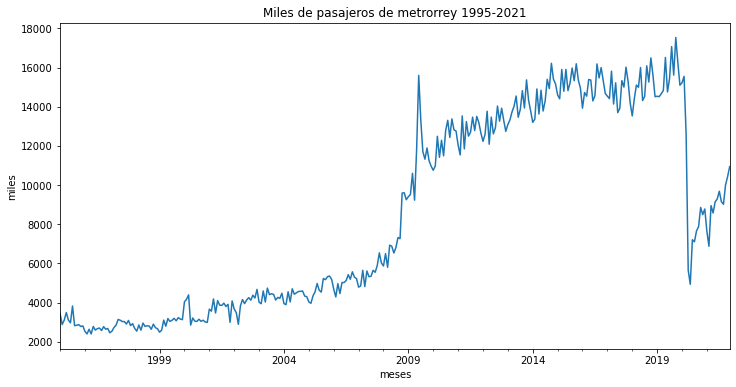

In [7]:
metrorrey['miles_pasajeros_month'].plot(figsize=(12,6))
plt.title('Miles de pasajeros de metrorrey 1995-2021')
plt.ylabel('miles')
plt.xlabel('meses')
plt.show()

Se puede observar una tendencia positiva hasta el primer trimestre del 2020 por lo cual podemos descartar que haya estacionalidad en la serie. Para complementar el análisis preliminar, tenemos las siguientes observaciones:
- Se obtuvo un incremento significativo en los usuarios del metro a inicios del 2009, esto lo podemos atribuir a la ampliación que tuvo una de las líneas del metro la cual conectó hasta el municipio de General Escobedo.
- La caída que hubo en Abril del 2020 fue consecuencia de la emergencia sanitaria por Covid-19 ya que se decidieron reducir los aforos en locales, empresas y en el transporte público incluido el metro.

### Propósito del pronóstico

Es de interés para Metrorrey el conocer la cantidad de pasajeros que se espera en los próximos meses, ya que en base a esto se pueden tomar medidas como aumentar la frecuencia de tiempo que hay de espera entre cada tren en las estaciones o incluso, la cantidad de vagones, con el fin de proporcionar el mejor servicio a los usuarios.

Otra razón para conocere el pronóstico es por si Metrorrey planea aplicar un aumento a la tarifa del metro como ya ocurrió en Junio del 2022. Ya que si el objetivo es hacer una recaudación para aplicarla en otras obras del metro como lo es la construcción de las siguientes 3 líneas del metro, según lo pronosticado se podría determinar la cantidad de dinero "extra".

### Estadísticas Descriptivas

In [8]:
prom_usuarios =round(metrorrey['miles_pasajeros_month'].mean(),2)
prom_usuarios

8477.41

El promedio de usuarios mensuales desde 1995 hasta 2021 ha sido de 8,477.41 miles de personas.

Como esta estadística abarca demasiado de tiempo, se hará un promedio del 2015-2019 y del 2020 en adelante, esto para comparar como cambio el promedio a consecuencia del Covid-19

In [9]:
bf_covid = round(metrorrey.loc['2015/01':'2019/12', 'miles_pasajeros_month'].mean(),2)
af_covid = round(metrorrey.loc['2020/01':, 'miles_pasajeros_month'].mean(),2)
print(f'El promedio mensual de usuarios del metro antes de covid fue de: {bf_covid}, mientras que despues de covid se ha registrado el promedio de: {af_covid}')

El promedio mensual de usuarios del metro antes de covid fue de: 15151.16, mientras que despues de covid se ha registrado el promedio de: 9148.76


In [10]:
print(metrorrey.columns)

Index(['miles_pasajeros_month'], dtype='object')


### Media Movil

Para observar mejor cual ha sido el comportamiento de la cantidad de usuarios del metro, aplicaremos el promedio móvil para 3 y 6 periodos

In [11]:
metrorrey['PMS-3'] = metrorrey['miles_pasajeros_month'].rolling(window=3).mean()
metrorrey['PMS-6'] = metrorrey['miles_pasajeros_month'].rolling(window=6).mean()

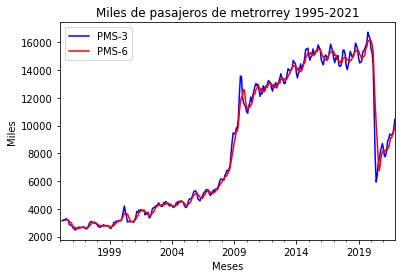

In [25]:
metrorrey['PMS-3'].plot(color = 'blue')
metrorrey['PMS-6'].plot(color='red')
plt.title('Miles de pasajeros de metrorrey 1995-2021')
plt.ylabel('Miles')
plt.xlabel('Meses')
plt.legend()

### Componente Estacional

Se usará la descomposición estacional para obtener el componente estacional y luego observar la serie desestacionalizada.

Comenzaremos observando los 4 elementos:
- Cantidad de pasajeros
- Tendencia
- Estacionalidad
- Residuos

In [13]:
#librerias especializadas
from statsmodels.tsa.api import seasonal_decompose

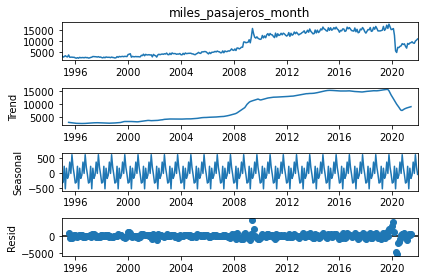

In [14]:
serie_metrorrey = seasonal_decompose(metrorrey['miles_pasajeros_month'], model='ad')
serie_metrorrey.plot()
plt.show()

Ahora obtendremos el componente estacional:

In [15]:
serie_metrorrey.seasonal.loc['2019/01':].sort_values()

Periodos
2019-04-01   -535.309943
2021-04-01   -535.309943
2020-04-01   -535.309943
2019-01-01   -343.468678
2021-01-01   -343.468678
2020-01-01   -343.468678
2019-02-01   -312.674499
2021-02-01   -312.674499
2020-02-01   -312.674499
2021-06-01   -186.549377
2020-06-01   -186.549377
2019-06-01   -186.549377
2021-07-01    -75.792159
2019-07-01    -75.792159
2020-07-01    -75.792159
2019-12-01    -52.439037
2020-12-01    -52.439037
2021-12-01    -52.439037
2021-09-01    -20.045927
2020-09-01    -20.045927
2019-09-01    -20.045927
2021-05-01    154.851972
2019-05-01    154.851972
2020-05-01    154.851972
2021-11-01    185.096948
2019-11-01    185.096948
2020-11-01    185.096948
2019-03-01    218.389504
2020-03-01    218.389504
2021-03-01    218.389504
2020-08-01    360.291710
2021-08-01    360.291710
2019-08-01    360.291710
2020-10-01    607.649485
2019-10-01    607.649485
2021-10-01    607.649485
Name: seasonal, dtype: float64

Lo que nos da a entender que en su mayoría, los tiempos donde menos pasajeros hubo en el metro fue en los meses despues de Marzo del 2020 donde dio inicio la pandemia por Covid-19.

Ahora desestacionalizaremos la serie:

In [16]:
metrorrey['pas_desestacionalizado'] = metrorrey['miles_pasajeros_month']-serie_metrorrey.seasonal

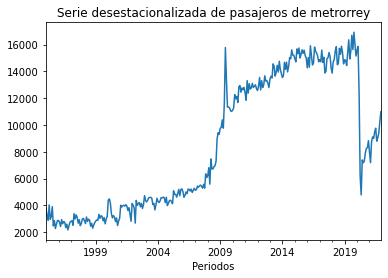

In [17]:
metrorrey['pas_desestacionalizado'].plot()
plt.title('Serie desestacionalizada de pasajeros de metrorrey')
plt.show()

### Análisis ARIMA

Como ya se graficó anteriormente, se descartó que la serie es estacionaria, sin embargo lo demostraremos estadísticamente verificando si es, o no, un proceso estacionario mediante la prueba de dickey fuller (también conocida como prueba de raíz unitaria):

In [18]:
# las librerias de series de tiempo:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA

In [19]:
ADF_test = adfuller(metrorrey['miles_pasajeros_month'])
#H0: la serie es NO ESTACIONARIA

#Significancia 0.05
alpha = 0.05
if ADF_test[1] < alpha:
    print('Se rechaza H0, la serie es estacionaria')
else:
    print('No se rechaza H0, la serie es NO estacionaria')

No se rechaza H0, la serie es NO estacionaria


La serie es NO estacionaria, por lo que la diferenciaremos una vez

In [20]:
metrorrey['pasajeros_diff'] = metrorrey['miles_pasajeros_month'].diff()
metrorrey.head()

,miles_pasajeros_month,PMS-3,PMS-6,pas_desestacionalizado,pasajeros_diff
Periodos,,,,,
1995-01-01,3439.0,NaN,NaN,3782.468678,NaN
1995-02-01,2879.0,NaN,NaN,3191.674499,-560.0
1995-03-01,3103.0,3140.333333,NaN,2884.610496,224.0
1995-04-01,3491.0,3157.666667,NaN,4026.309943,388.0
1995-05-01,3109.0,3234.333333,NaN,2954.148028,-382.0


Una vez diferenciada, verificamos si ya es estacionaria:

In [21]:
ADF_test1 = adfuller(metrorrey['pasajeros_diff'].dropna())
#H0: la serie es NO ESTACIONARIA

#Significancia 0.05
alpha = 0.05
if ADF_test1[1] < alpha:
    print('Se rechaza H0, la serie es estacionaria')
else:
    print('No se rechaza H0, la serie es NO estacionaria')

Se rechaza H0, la serie es estacionaria


La serie ya es estacionaria, ahora realizaremos las gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF)

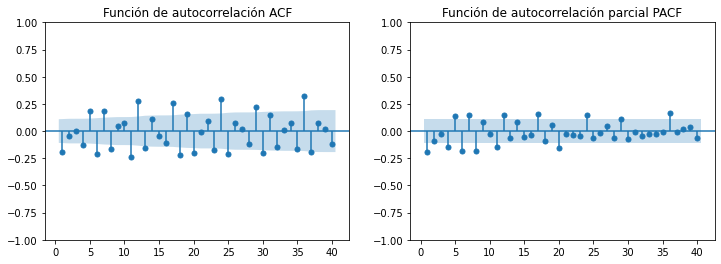

In [22]:
fig, ax =plt.subplots(1,2, figsize =(12,4))
## subgrafica 0
plot_acf(metrorrey['pasajeros_diff'].dropna(), zero=False, lags=40, ax=ax[0], title= 'Función de autocorrelación ACF')
ax[0].set_ylim(-1,1)
## subgrafica 1
plot_pacf(metrorrey['pasajeros_diff'].dropna(), zero=False, lags=40, ax=ax[1], title= 'Función de autocorrelación parcial PACF')
ax[1].set_ylim(-1,1)
plt.show()

A pesar de tener algunos valores atipicos principalmente en la autocorrelación, se puede decir que la serie de tiempo sigue un procceso ARMA(p,q) ya que la manera en que decienden los valores no llega a ser abrupta ni es del todo de una manera gradual, dicho "patrón" se aprecia mejor en la autocorrelación parcial, por lo que aproxima mas a un proceso ARMA(p,q).
- https://www.youtube.com/watch?v=aiF5nllESck

### Estimador de modelos

Ahora mediante un ciclo for, obtendremos cual será el modelo óptimo para nuestra serie de tiempo

In [26]:
ic = {}
for ar in range(10):
    for ma in range(10):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(metrorrey['miles_pasajeros_month'], order=(ar,1,ma))
        resultado = modelo.fit()
        ic[(ar,ma)] = [resultado.aic, resultado.bic]
        
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 0, MA: 7
AR: 0, MA: 8
AR: 0, MA: 9
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 1, MA: 7
AR: 1, MA: 8
AR: 1, MA: 9
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 7


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 8


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 9


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 7


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 8


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 9


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 5


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 7


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 8


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 9


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 3


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 5


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 6


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 7


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 8


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 9


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 3


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 4


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 7


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 8


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 9


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 0
AR: 7, MA: 1
AR: 7, MA: 2


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 3


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 4


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 5


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 6


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 7


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 8


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 9


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 0
AR: 8, MA: 1
AR: 8, MA: 2


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 3


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 4


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 5


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 6


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 7


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 8


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 9


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 0
AR: 9, MA: 1
AR: 9, MA: 2


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 3


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 4


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 5


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 6


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 7


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 8


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 9


G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
ic.sort_values('AIC', ascending=True).head(3) 

,,AIC,BIC
AR,MA,,
2,4,5215.819680,5242.263246
3,4,5216.607120,5246.828339
8,4,5216.997792,5266.107272


In [28]:
ic.sort_values('BIC', ascending=True).head(3) 

,,AIC,BIC
AR,MA,,
2,4,5215.81968,5242.263246
4,2,5220.17837,5246.621936
3,4,5216.60712,5246.828339


Una vez estimado cual fue el mejor modelo, se obtuvo que el criterio de akaike (AIC) y el criterio bayesiano (BIC) coincidieron en los mismos valores para AR y MA, por lo que el mejor modelo es un ARIMA(2,1,4)

In [29]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [30]:
modelo = ARIMA(metrorrey['miles_pasajeros_month'], order=(2,1,4))
resultado = modelo.fit()
print(resultado.summary())

                                 SARIMAX Results                                 
Dep. Variable:     miles_pasajeros_month   No. Observations:                  324
Model:                    ARIMA(2, 1, 4)   Log Likelihood               -2600.910
Date:                   Sun, 14 May 2023   AIC                           5215.820
Time:                           20:59:39   BIC                           5242.263
Sample:                       01-01-1995   HQIC                          5226.376
                            - 12-01-2021                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7249      0.006   -299.154      0.000      -1.736      -1.714
ar.L2         -0.9959      0.007   -152.805      0.000      -1.009      -0.983
ma.L1          1.7365      0

G:\Aplicaciones\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Este es un ARMA(2,4) y gracias a sus coeficientes, sabemos que la ecuación está dada por: 

$Y_t = -1.72 Y_{t-1} - 0.99 Y_{t-2} + 1.73 \varepsilon_{t-1} + 0.79 \varepsilon_{t-2} - 0.41 \varepsilon_{t-3} - 0.27 \varepsilon_{t-4} + \varepsilon_t $

$\varepsilon \sim N(0, \sigma^2_{\varepsilon} = 669,200) $

### Pronósticos

Ahora se harán los pronósticos para los siguientes 5 meses a la ultima fecha registrada, es decir se estimará cual puede ser la cantidad de pasajeros (en miles) esperados para los meses de enero a mayo:

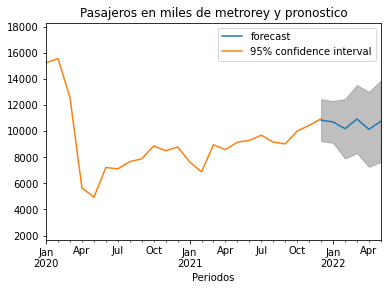

In [31]:
from statsmodels.graphics.tsaplots import plot_predict

# codigo
plot_predict(resultado, start = '2021/12', end='2022/05')
metrorrey['miles_pasajeros_month'].plot()
plt.title('Pasajeros en miles de metrorey y pronostico')
plt.xlim('2020-01', '2022-05')
plt.show()

In [32]:
resultado.predict('2022/01', '2022/05')

2022-01-01    10697.187966
2022-02-01    10175.277002
2022-03-01    10915.941715
2022-04-01    10129.043496
2022-05-01    10748.766035
Freq: MS, Name: predicted_mean, dtype: float64

Por lo tanto, esperamos que:
- Enero 2022 haya 10,701
- Febrero 2022 haya 10,177
- Marzo 2022 haya 10,912
- Abril 2022 haya 10,134
- Mayo 2022 haya 10,744

**miles de pasajeros de metrorrey** con un 95% de confianza, lo cual quiere decir que el pronóstico que hay para cada mes puede variar dentro de su intervalo, es decir puede ser menor o incluso mayor a lo pronosticado
